In [99]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

import seaborn as sns
%matplotlib inline

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')



In [100]:
#import statsmodels.api as sm

In [149]:
ds = pd.read_csv("/Users/clara/Desktop/TESIS_I/DS_Final2.csv")
#le sumamos una columna donde ordenamos la varibla Campaña - Año para poder graficar correctamente
ds['Campaña-Año1'] = pd.to_datetime(ds['Campaña-Año'],format='%m-%Y') 

In [150]:
ds_tig = ds[ds['Gobierno_local']== 'Tigre'] #Nos quedamos con un subset para los análisis. Tomamos Tigre con los datos de 2017 en adelante

ds_tig = ds_tig[ds_tig['Año']>= 2017]
#me quedo con Campaña año 2018-03 en adelante ya que no hay registros anteriores a eso
ds_tig_2018 = ds_tig[(ds_tig['Campaña-Año1']> '02-2018') &(ds_tig['Año'] != 2022)]


Vamos a realizar un análisis de PCA para reducir la dimensionalidad del problema. 

In [151]:
#1) Nos quedamos solo con variables númericas

ds_tig_num = ds_tig_2018[['Tem_agua','OD','pH','Turbiedad_NTU','escher_coli_ufc_100ml','Nitrato_mg_l','NH4_mg_l','P_total_l_mg_l','DBO_mg_l','Hidr_Deriv_Petr_ug_l','Cr_total_mg_l','Cd_total_mg_l','Microcistina_ug_l','Clorofila_a_ug_l','ICA']]

ds_tig_num['DBO_mg_l']= ds_tig_num['DBO_mg_l'].fillna(ds_tig_num['DBO_mg_l'].mean())




In [152]:
ds_tig_num.fillna(0)

,Tem_agua,OD,pH,Turbiedad_NTU,escher_coli_ufc_100ml,Nitrato_mg_l,NH4_mg_l,P_total_l_mg_l,DBO_mg_l,Hidr_Deriv_Petr_ug_l,Cr_total_mg_l,Cd_total_mg_l,Microcistina_ug_l,Clorofila_a_ug_l,ICA
330,22.0,0.0,8.0,69.0,400,2.0,49.0,1.0,4.0,49.0,0.006,0.002,0.50,10.0,58
333,21.0,0.0,8.0,89.0,300,3.0,49.0,0.0,18.0,49.0,0.006,0.002,0.50,10.0,61
334,22.0,0.0,8.0,82.0,400,3.0,49.0,1.0,14.0,59.0,0.006,0.002,0.50,10.0,55
346,25.0,2.0,7.0,31.0,2500,3.0,39.0,1.0,4.0,100.0,5.000,0.001,0.15,0.0,30
388,23.0,1.0,7.0,13.0,5000,2.0,10.0,1.0,12.0,100.0,0.005,0.001,0.20,1246.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,22.0,8.0,7.0,72.0,49,5.0,0.0,2.0,8.0,50.0,0.006,0.002,0.50,10.0,52
979,26.0,0.0,7.0,42.0,60,5.0,0.0,0.0,8.0,49.0,0.006,0.002,0.50,10.0,70
1009,27.0,0.0,7.0,56.0,140,6.0,0.0,1.0,12.0,57.0,0.006,0.002,0.50,10.0,59
1055,26.0,0.0,7.0,60.0,150,7.0,0.0,0.0,12.0,49.0,0.006,0.002,0.50,10.0,62


In [153]:
ds_tig_num.head()

,Tem_agua,OD,pH,Turbiedad_NTU,escher_coli_ufc_100ml,Nitrato_mg_l,NH4_mg_l,P_total_l_mg_l,DBO_mg_l,Hidr_Deriv_Petr_ug_l,Cr_total_mg_l,Cd_total_mg_l,Microcistina_ug_l,Clorofila_a_ug_l,ICA
330,22.0,0.0,8.0,69.0,400,2.0,49.0,1.0,4.0,49.0,0.006,0.002,0.50,10.0,58
333,21.0,0.0,8.0,89.0,300,3.0,49.0,0.0,18.0,49.0,0.006,0.002,0.50,10.0,61
334,22.0,0.0,8.0,82.0,400,3.0,49.0,1.0,14.0,59.0,0.006,0.002,0.50,10.0,55
346,25.0,2.0,7.0,31.0,2500,3.0,39.0,1.0,4.0,100.0,5.000,0.001,0.15,0.0,30
388,23.0,1.0,7.0,13.0,5000,2.0,10.0,1.0,12.0,100.0,0.005,0.001,0.20,1246.0,28


In [154]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
ds_tig_num.mean(axis=0)

----------------------
Media de cada variable
----------------------


Tem_agua                   20.277778
OD                          3.388889
pH                          7.222222
Turbiedad_NTU              54.388889
escher_coli_ufc_100ml    5114.694444
Nitrato_mg_l                2.944444
NH4_mg_l                    3.333333
P_total_l_mg_l              0.518519
DBO_mg_l                    8.065421
Hidr_Deriv_Petr_ug_l       79.851852
Cr_total_mg_l               9.171000
Cd_total_mg_l               0.149935
Microcistina_ug_l           1.132870
Clorofila_a_ug_l           63.370370
ICA                        49.185185
dtype: float64

In [156]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
ds_tig_num.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Tem_agua                 2.384735e+01
OD                       1.063240e+01
pH                       1.744548e-01
Turbiedad_NTU            6.233614e+02
escher_coli_ufc_100ml    8.131588e+07
Nitrato_mg_l             1.492212e+00
NH4_mg_l                 7.736449e+01
P_total_l_mg_l           3.641398e-01
DBO_mg_l                 2.768731e+01
Hidr_Deriv_Petr_ug_l     1.207062e+03
Cr_total_mg_l            7.604338e+02
Cd_total_mg_l            5.193699e-01
Microcistina_ug_l        7.255101e+00
Clorofila_a_ug_l         1.016962e+05
ICA                      1.586757e+02
dtype: float64

In [157]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(ds_tig_num)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [158]:
modelo_pca.components_


array([[-2.41160757e-01,  1.98048594e-01, -1.01410603e-01,
        -3.29573060e-01,  3.24829785e-01,  7.26946274e-03,
        -5.21718653e-02, -1.83990004e-02, -1.50134046e-01,
         2.52226212e-01,  4.92409466e-01,  2.51077820e-01,
         4.85396188e-01,  9.09902411e-03, -2.18472815e-01],
       [-2.86186687e-01,  4.06872846e-01,  2.78190632e-01,
         1.97837762e-01, -2.68853673e-01,  4.54501995e-02,
        -1.76709618e-01, -3.76584839e-01, -3.09191108e-01,
         1.07373593e-01,  4.08633970e-02,  5.98269742e-02,
         3.72572037e-02, -1.31805828e-01,  5.07437900e-01],
       [ 3.17761280e-01,  1.86502140e-01, -4.96068611e-01,
        -3.25746123e-01, -2.48376525e-01, -2.48653354e-01,
        -2.18666059e-01, -2.44871247e-01, -1.74599087e-01,
         2.85737556e-01, -7.41262019e-02, -2.66838854e-01,
        -9.43700488e-02,  2.87805783e-01,  1.36974880e-02],
       [-1.53672640e-01, -2.52218465e-01,  1.79662569e-01,
        -1.16048393e-01, -1.27197177e-01,  5.62913017

In [159]:
ds_tig_num.columns


Index(['Tem_agua', 'OD', 'pH', 'Turbiedad_NTU', 'escher_coli_ufc_100ml',
       'Nitrato_mg_l', 'NH4_mg_l', 'P_total_l_mg_l', 'DBO_mg_l',
       'Hidr_Deriv_Petr_ug_l', 'Cr_total_mg_l', 'Cd_total_mg_l',
       'Microcistina_ug_l', 'Clorofila_a_ug_l', 'ICA'],
      dtype='object')

In [160]:
# Se combierte el array a dataframe para añadir nombres a los ejes.

pd.DataFrame(
    data    = modelo_pca.components_,
    columns = ds_tig_num.columns,
    #index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Tem_agua,OD,pH,Turbiedad_NTU,escher_coli_ufc_100ml,Nitrato_mg_l,NH4_mg_l,P_total_l_mg_l,DBO_mg_l,Hidr_Deriv_Petr_ug_l,Cr_total_mg_l,Cd_total_mg_l,Microcistina_ug_l,Clorofila_a_ug_l,ICA
0,-0.241161,0.198049,-0.101411,-0.329573,0.324830,0.007269,-0.052172,-0.018399,-0.150134,0.252226,0.492409,0.251078,0.485396,0.009099,-0.218473
1,-0.286187,0.406873,0.278191,0.197838,-0.268854,0.045450,-0.176710,-0.376585,-0.309191,0.107374,0.040863,0.059827,0.037257,-0.131806,0.507438
2,0.317761,0.186502,-0.496069,-0.325746,-0.248377,-0.248653,-0.218666,-0.244871,-0.174599,0.285738,-0.074126,-0.266839,-0.094370,0.287806,0.013697
3,-0.153673,-0.252218,0.179663,-0.116048,-0.127197,0.562913,0.009258,0.214177,-0.450805,0.401062,-0.130291,-0.194878,-0.122830,0.159125,-0.169056
4,-0.177144,0.124209,0.370252,-0.213010,0.039167,-0.268374,0.423482,-0.239423,0.011934,0.014467,-0.195129,0.245713,-0.205908,0.542584,-0.157847
5,-0.013237,-0.141696,0.014760,0.079102,-0.262937,-0.209019,0.664878,0.007587,0.025599,0.203449,0.269924,-0.440503,0.278571,-0.114974,0.136225
6,0.369899,-0.158959,0.013431,0.078489,-0.022694,0.494112,0.054915,-0.379277,0.074007,-0.286731,0.248423,0.036217,0.267016,0.440203,0.155707
7,0.469220,0.177200,-0.131921,-0.128686,0.111544,0.153661,0.452963,0.011792,-0.360989,0.018273,-0.108294,0.404069,-0.145977,-0.366204,0.109726
8,0.116125,-0.008189,-0.077770,0.451016,0.049239,-0.291165,-0.041109,0.502722,-0.390354,-0.017292,0.111423,0.177921,0.098549,0.438129,0.192217
9,0.036862,-0.330165,-0.093670,0.154856,-0.152852,0.001735,-0.043799,-0.074502,0.396503,0.625802,-0.033272,0.492128,-0.007817,0.015651,0.183292


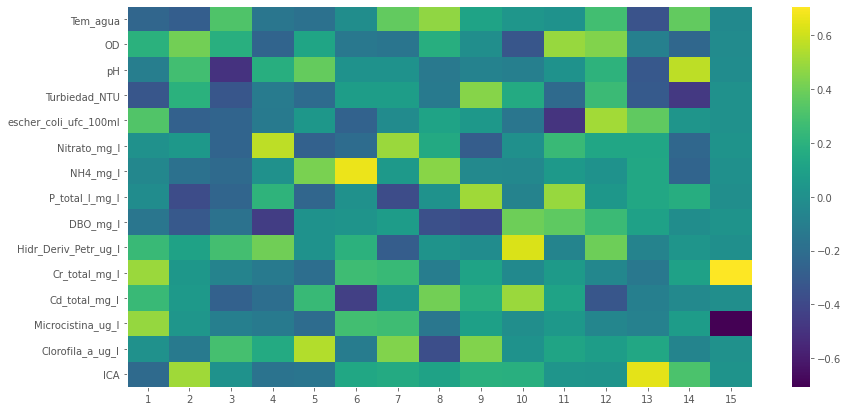

In [161]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(ds_tig_num.columns)), ds_tig_num.columns)
plt.xticks(range(len(ds_tig_num.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[2.09952975e-01 1.44481216e-01 1.29658083e-01 8.56594362e-02
 7.65153617e-02 6.77363360e-02 5.68393870e-02 4.96067968e-02
 4.68315166e-02 3.95098831e-02 3.75436858e-02 2.57260455e-02
 1.82069436e-02 1.15321215e-02 2.00212295e-04]


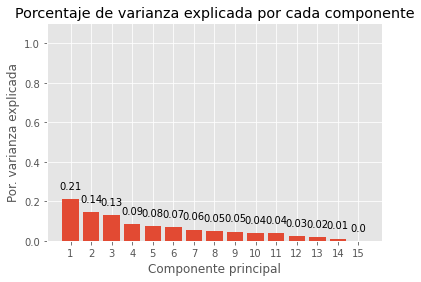

In [162]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(ds_tig_num.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.20995297 0.35443419 0.48409227 0.56975171 0.64626707 0.71400341
 0.77084279 0.82044959 0.86728111 0.90679099 0.94433468 0.97006072
 0.98826767 0.99979979 1.        ]


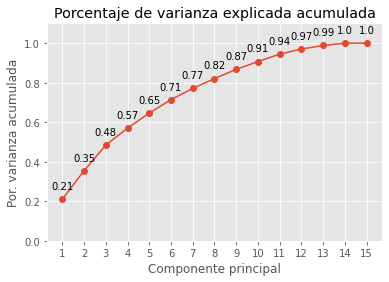

In [163]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(ds_tig_num.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(ds_tig_num.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [164]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=ds_tig_num)
#proyecciones[0]

In [165]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=ds_tig_num)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ds_tig_num.columns
    #index   = datos.index
)
proyecciones.head()


,Tem_agua,OD,pH,Turbiedad_NTU,escher_coli_ufc_100ml,Nitrato_mg_l,NH4_mg_l,P_total_l_mg_l,DBO_mg_l,Hidr_Deriv_Petr_ug_l,Cr_total_mg_l,Cd_total_mg_l,Microcistina_ug_l,Clorofila_a_ug_l,ICA
0,-1.733273,-0.518830,-2.271099,0.285539,2.418596,3.840710,0.059206,2.242892,0.840963,-0.764022,-0.101070,-0.535475,0.253641,0.336727,-0.094080
1,-2.369492,-0.338458,-2.856115,-0.913916,2.455200,3.826506,1.319439,1.209606,-0.894395,0.583919,0.068232,0.339339,0.368051,-0.568126,0.010739
2,-2.061141,-1.058670,-2.900019,-0.016512,2.151183,3.785297,0.527775,1.591737,0.041124,0.212574,0.636964,0.304663,0.215742,-0.196026,-0.036372
3,0.014823,-2.208286,0.099360,1.159794,1.473440,2.608715,-0.398591,2.583107,-0.237380,-0.433129,0.351833,-0.255349,-0.316263,-0.753516,0.090847
4,0.309741,-2.963466,1.879338,0.840165,2.696165,0.018956,0.622689,-1.156484,0.854529,0.286097,0.804785,0.024362,0.238850,0.168731,0.006445


In [166]:
proyecciones = np.dot(modelo_pca.components_, scale(ds_tig_num).T)
proyecciones = pd.DataFrame(proyecciones)
proyecciones = proyecciones.transpose().set_index(ds_tig_num.index)
#proyecciones.head()
#a = proyecciones

In [167]:
proyecciones.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,108.000000,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02
mean,3.572245e-17,1.819532e-16,9.277558e-17,-2.467162e-17,-8.840665e-17,3.597945e-17,-1.685894e-16,0.000000,2.408053e-16,4.805827e-17,-1.182182e-16,-8.018277e-17,1.284980e-16,-1.737293e-16,9.560254e-17
std,1.782899e+00,1.479011e+00,1.401088e+00,1.138815e+00,1.076316e+00,1.012690e+00,9.276632e-01,0.866635,8.420439e-01,7.734255e-01,7.539353e-01,6.240971e-01,5.250300e-01,4.178498e-01,5.505680e-02
min,-2.500872e+00,-2.963466e+00,-4.265906e+00,-2.604876e+00,-1.787991e+00,-3.772561e+00,-1.820741e+00,-2.958921,-1.469022e+00,-2.137501e+00,-2.067769e+00,-1.709298e+00,-1.243108e+00,-8.023670e-01,-1.179793e-01
25%,-1.052327e+00,-9.747751e-01,-6.576929e-01,-8.912028e-01,-6.174014e-01,-4.357486e-01,-5.981045e-01,-0.622487,-5.665398e-01,-4.333110e-01,-5.295753e-01,-3.371563e-01,-3.483155e-01,-2.821964e-01,-3.163765e-02
50%,-3.251757e-01,-1.223497e-01,1.417343e-01,1.395363e-02,-1.889236e-01,-1.487760e-01,5.194198e-02,-0.014894,-7.862795e-02,-1.537382e-01,5.510723e-03,-2.193977e-02,-6.450829e-02,-8.938213e-03,2.341960e-03
75%,3.673800e-01,1.079041e+00,8.437055e-01,8.289491e-01,5.039582e-01,8.611860e-02,4.899080e-01,0.528321,5.246551e-01,2.328016e-01,5.461330e-01,3.258074e-01,3.440278e-01,2.875301e-01,3.072495e-02
max,8.220071e+00,3.742177e+00,4.502622e+00,2.679551e+00,5.606144e+00,3.840710e+00,3.800793e+00,3.363925,3.178710e+00,3.304720e+00,2.409358e+00,2.166160e+00,1.764339e+00,1.264175e+00,1.357564e-01


In [168]:
loads = pd.DataFrame(pca.components_)
loads

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.274482,0.258267,-0.069540,-0.293470,0.283422,0.009385,-0.076668,-0.074586,-0.190758,0.264706,0.504064,0.259818,0.496890,-0.013990
1,0.331580,0.167429,-0.511431,-0.335784,-0.232835,-0.251582,-0.209693,-0.226121,-0.158741,0.280634,-0.071790,-0.267823,-0.091816,0.292976
2,0.322817,-0.381647,-0.389283,-0.184285,0.370146,-0.108667,0.197374,0.395683,0.387196,-0.139971,0.151280,0.015347,0.157380,0.053783
3,-0.020485,-0.371509,-0.011327,-0.083463,-0.073951,0.603472,-0.005235,0.353132,-0.376457,0.383226,-0.004086,-0.264651,0.008778,0.037066
4,-0.106262,-0.079757,0.307505,-0.240012,0.019862,-0.136024,0.635128,-0.087547,-0.046101,0.153987,-0.087258,0.107039,-0.090460,0.589187
5,0.088696,0.024856,0.013366,-0.156400,0.321015,0.292829,-0.463958,0.022626,-0.052942,-0.160733,-0.247600,0.515247,-0.253558,0.377614
6,0.265469,-0.114591,0.057458,0.109338,-0.133988,0.449788,0.003363,-0.509993,0.160789,-0.323659,0.285861,-0.164664,0.309224,0.292770
7,-0.445441,-0.192727,0.089395,0.213762,-0.057954,-0.259224,-0.446413,0.201621,0.246999,0.042220,0.096265,-0.283319,0.128576,0.481043
8,-0.284187,-0.161328,0.047109,-0.468796,-0.012408,0.195690,-0.081938,-0.315887,0.584418,0.266796,-0.160396,-0.059023,-0.131576,-0.258898
9,0.094717,-0.540200,-0.064213,0.402853,0.234342,-0.220980,-0.058887,-0.436787,-0.138788,0.393526,-0.023796,0.232101,-0.004466,-0.078849


In [169]:
loads[0]

0    -0.274482
1     0.331580
2     0.322817
3    -0.020485
4    -0.106262
5     0.088696
6     0.265469
7    -0.445441
8    -0.284187
9     0.094717
10   -0.186905
11    0.291325
12    0.459765
13   -0.033348
Name: 0, dtype: float64

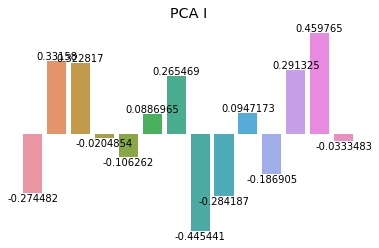

In [170]:
#graficamos los loads de las primeros 5 coponentes 

ax = sns.barplot(x=np.arange(len(loads[0])), y=loads[0])
ax.bar_label(ax.containers[0])
plt.axis('off')
plt.title('PCA I')
plt.show()

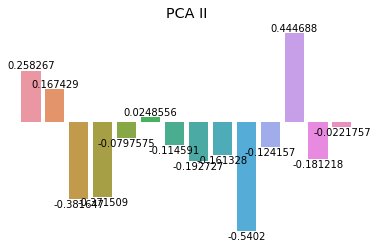

In [171]:
ax = sns.barplot(x=np.arange(len(loads[1])), y=loads[1])
ax.bar_label(ax.containers[0])
plt.axis('off')
plt.title('PCA II')
plt.show()

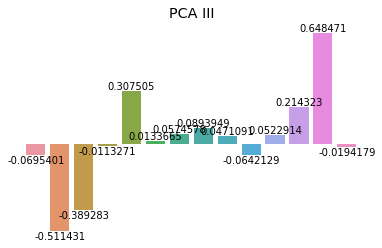

In [172]:
ax = sns.barplot(x=np.arange(len(loads[2])), y=loads[2])
ax.bar_label(ax.containers[0])
plt.axis('off')
plt.title('PCA III')
plt.show()

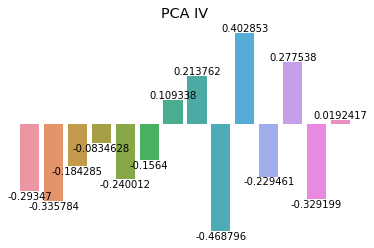

In [173]:
ax = sns.barplot(x=np.arange(len(loads[3])), y=loads[3])
ax.bar_label(ax.containers[0])
plt.axis('off')
plt.title('PCA IV')
plt.show()

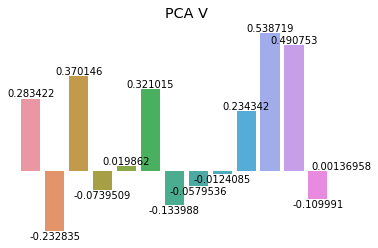

In [174]:
ax = sns.barplot(x=np.arange(len(loads[4])), y=loads[4])
ax.bar_label(ax.containers[0])
plt.axis('off')
plt.title('PCA V')
plt.show()

Todas las componentes son de forma ya que presentan valores positivos y negativos. Se observa que la componente 1 prepondera aquellas mediciones con gran precencia de microcistina, OD,pH, amonio y cadmio. La component II la precencia de cadmio, niveles de temperatura de agua y OD. La componente III prepondera la variable microsistina. La componente IV pesa sobre la presencia de hidrocarburos derivados de petróleo en contraste con DBO y por último la componente 5 pondera positivamente el cromo y el cadmio.


In [127]:
proyecciones.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
330,-1.733273,-0.518830,-2.271099,0.285539,2.418596,3.840710,0.059206,2.242892,0.840963,-0.764022,-0.101070,-0.535475,0.253641,0.336727,-0.094080
333,-2.369492,-0.338458,-2.856115,-0.913916,2.455200,3.826506,1.319439,1.209606,-0.894395,0.583919,0.068232,0.339339,0.368051,-0.568126,0.010739
334,-2.061141,-1.058670,-2.900019,-0.016512,2.151183,3.785297,0.527775,1.591737,0.041124,0.212574,0.636964,0.304663,0.215742,-0.196026,-0.036372
346,0.014823,-2.208286,0.099360,1.159794,1.473440,2.608715,-0.398591,2.583107,-0.237380,-0.433129,0.351833,-0.255349,-0.316263,-0.753516,0.090847
388,0.309741,-2.963466,1.879338,0.840165,2.696165,0.018956,0.622689,-1.156484,0.854529,0.286097,0.804785,0.024362,0.238850,0.168731,0.006445


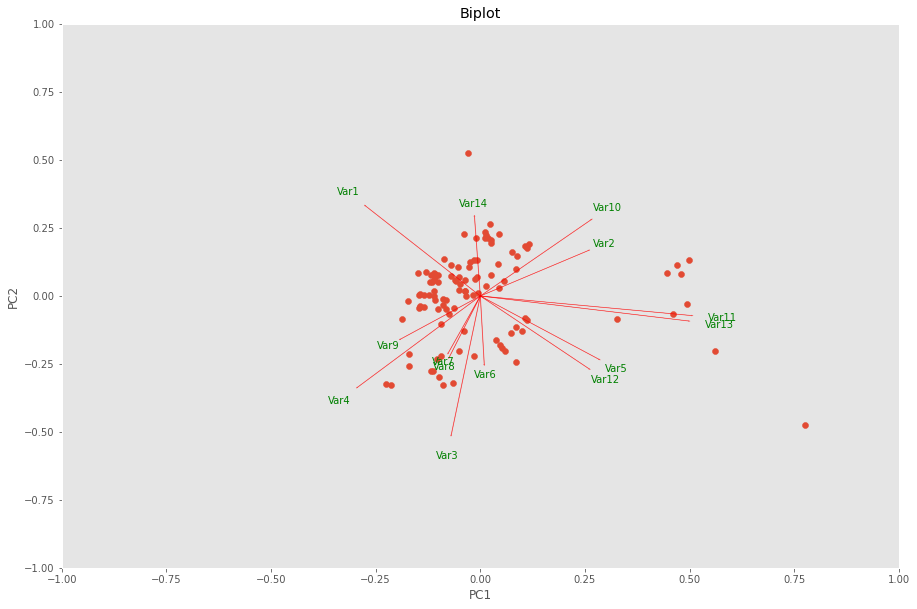

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

#iris = datasets.load_iris()
#X = iris.data
#y = iris.target



X = ds_tig_num.drop('ICA', axis=1)
Y = ds_tig_num['ICA']

# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    #plt.scatter(xs * scalex,ys * scaley, c = y)
    plt.figure(figsize=(15,10))
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.title('Biplot')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

Las variables con angulos muy peqeuños estan muy correlacionados. 
Vemos que la variable 9 (DBO) y la variable 4 (Turbiedad) estan muy relacionadas
La variable 8 (Fosforo) y 7 (amonio) estan muy relacionbadas
La variabes 5 (Escherichia coli) y 12 (Cadmio)
La variable 11 (Cromo) y 13 (Microcistina) 
La variables 10 (Hidrocarburos) y 2 (OD) estan relacionadas 

Cuando dos variables son ortogonales (perpendiculares) indica que no están correlacionadas.

La variable 1 (temperatura) no parece estar correlacionada con el resto de las variables

Las proyecciones de las variables 10, 2 , 11, 13,5,12 son positivas sobre la componente 1 y las variables 1,9,4,7,8,3 son negativas sobre las componente 1.

Se observa que la mayoria de las mediciones son los más cercanos al origen del nuevo sistema de coordenadas y se los considera promedios.


